In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd             
import seaborn as sns           
import sklearn                  

# **Обзор уровня самоубийств с 1985 по 2016 год**

В данном наборе данных собрана информация для выявления факторов коррелирующих с повышением уровня самоубийств среди различных групп по всему миру. 

#**1. Загружаем данные**

Таблица содержит данные о более 27800 группах самоубийц. Для каждой группы указан год, страна, возрастной диапазон, пол, поколение, количество самоубийств данной группы в конкретный год, общее количество людей данного возрастного диапазона в конкретный год, количество самоубийц на 100 тысяч населения, уровни абсолютного и подушевого ВВП, индекс человеческого развития.

In [2]:
url="https://raw.githubusercontent.com/pp3000/Machine-Learning/master/master.csv"
data = pd.read_csv(url)

Посмотрим на размер таблицы

In [3]:
data.shape

(27820, 12)

Выведем первые 5 строк таблицы

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Выведем последние 5 строк таблицы

In [5]:
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


Выведем имена признаков(столбцов)

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Каждый признак имеет своё имя:
- `country` - страна
- `year` - год
- `sex` - пол возратсной группы
- `age` - возрастная группа
- `suicides_no` - количество самоубийств группы
- `population` - количество населения данной группы
- `suicides/100k pop` - количество самоубийств на 100 тысяч человек
- `country-year` - год и страна
- `HDI for year` - индекс человеческого развития
- ` gdp_for_year ($) ` - ВВП 
- `gdp_per_capita ($)` - ВВП на душу населения
- `generation` - поколение


Признаки `country`, `sex`, `country-year`, `age`,`generation` - категориальные

Признаки `year`, `suicides_no`, `population`, `suicides/100k pop`, `HDI for year`, ` gdp_for_year ($) `, `gdp_per_capita ($)` - числовые

In [7]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Все категориалные признаки, имеющие тип `'Object'` переведём в спеиальный тип, предназначенный для хранения категориальных значений

In [8]:
for item in ['country', 'age','sex', 'country-year', 'generation']:
  data[item] = data[item].astype('category');

Признак ` gdp_for_year ($) ` числовой, но имеет тип `'Object'`. Так же в записи присутствуют запятые. Поэтому для признака ` gdp_for_year ($) ` уберём запятые и заменим тип на `float`

In [9]:
data[' gdp_for_year ($) ']=data[' gdp_for_year ($) '].str.replace(',','').astype(float)

In [10]:
data[' gdp_for_year ($) ']

0        2.156625e+09
1        2.156625e+09
2        2.156625e+09
3        2.156625e+09
4        2.156625e+09
             ...     
27815    6.306708e+10
27816    6.306708e+10
27817    6.306708e+10
27818    6.306708e+10
27819    6.306708e+10
Name:  gdp_for_year ($) , Length: 27820, dtype: float64

In [11]:
data.dtypes

country               category
year                     int64
sex                   category
age                   category
suicides_no              int64
population               int64
suicides/100k pop      float64
country-year          category
HDI for year           float64
 gdp_for_year ($)      float64
gdp_per_capita ($)       int64
generation            category
dtype: object

#**2. Боремся с выбросами**

Если взять статистику, то наибольшее количество суицидов на 100 тысяч населения будет в бедных странах, либо в странах периферийного капитализма, т.е. тоже в не очень богатых. Критерием, выявляющим такие страны является ВВП на душу населения. Построим диаграмму рассеивания для признаков `gdp_per_capita ($)` и `suicides_no`

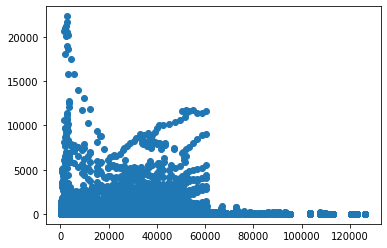

In [12]:
plt.scatter(x='gdp_per_capita ($)', y='suicides_no', data=data)
pass

Из диаграммы видно, что в странах с большим подушевым ВВП самоубийств очень мало. В странах с маленьким ВВП на душу населения ситуация обратная. 20 тысяч самоубийств это довольно много, но не нереально, во времена войн и различных трагических событий(например государственного террора направленного против своих граждан), цифра достижима. Но всё же, наряду с очень низкими показателями самоубийств в странах с высоким уровнем подушевого ВВП, будем считать их за выбросы.

Для обнаружения выбросов найдём квантили для признаков `gdp_per_capita ($)` и `suicides_no`

In [13]:
data['suicides_no'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       0.000
0.010       0.000
0.050       0.000
0.100       0.000
0.500      25.000
0.900     496.000
0.950    1050.050
0.990    3993.670
0.995    6325.115
Name: suicides_no, dtype: float64

In [14]:
data['gdp_per_capita ($)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       426.0
0.010       476.0
0.050       935.0
0.100      1524.0
0.500      9372.0
0.900     43487.0
0.950     54294.0
0.990     89634.0
0.995    107430.0
Name: gdp_per_capita ($), dtype: float64

Удалим все строки таблицы, в которых `gdp_per_capita ($)` или `suicides_no` выходят за пределы квантилей $0.005$, $0.995$

In [15]:
rows_to_drop = data[
    (data['gdp_per_capita ($)'] < data['gdp_per_capita ($)'].quantile(0.005)) | (data['gdp_per_capita ($)'] > data['gdp_per_capita ($)'].quantile(0.995)) | 
    (data['suicides_no']  < data['suicides_no' ].quantile(0.005)) | (data['suicides_no']  > data['suicides_no' ].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(27416, 12)

In [16]:
rows_to_drop

Int64Index([   36,    37,    38,    39,    40,    41,    42,    43,    44,
               45,
            ...
            27161, 27162, 27173, 27174, 27185, 27186, 27197, 27198, 27209,
            27210],
           dtype='int64', length=404)

#**3. Визуализация и описательная статистика**

In [17]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27416.000000,27416.000000,2.741600e+04,27416.000000,8231.000000,2.741600e+04,27416.000000
mean,2001.227896,196.169573,1.763770e+06,12.611183,0.775542,4.278492e+11,16442.348665
std,8.474799,540.752165,3.618902e+06,18.718327,0.092353,1.383653e+12,17661.509817
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,426.000000
25%,1995.000000,3.000000,9.803450e+04,0.900000,0.713000,9.024567e+09,3492.000000
50%,2002.000000,25.000000,4.314125e+05,5.910000,0.778000,4.755467e+10,9356.000000
75%,2008.000000,130.000000,1.472438e+06,16.330000,0.851000,2.581543e+11,24654.000000
max,2016.000000,6250.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,107430.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках. Получил информацию о категориальных:

In [18]:
data.describe(include=['category'])

,country,sex,age,country-year,generation
count,27416,27416,27416,27416,27416
unique,101,2,6,2299,6
top,Mauritius,female,75+ years,Uzbekistan2014,Generation X
freq,382,13778,4598,12,6321


Количество самоубийств по возрастным группам

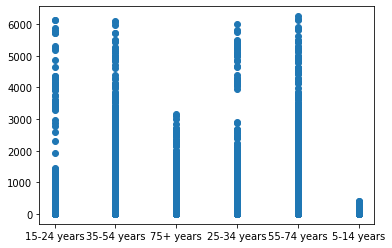

In [19]:
plt.scatter(data['age'], data['suicides_no'])
pass

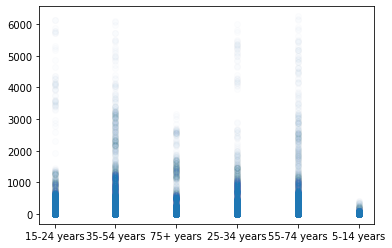

In [20]:
plt.scatter(data['age'], data['suicides_no'], alpha=0.01)
pass

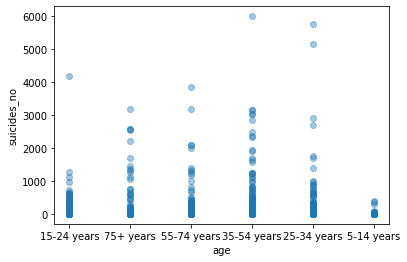

In [21]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['age'], data.iloc[random_subset]['suicides_no'], alpha=0.4)
plt.xlabel('age')
plt.ylabel('suicides_no')
pass

Количество суицидов относительно абсолютного ВВП

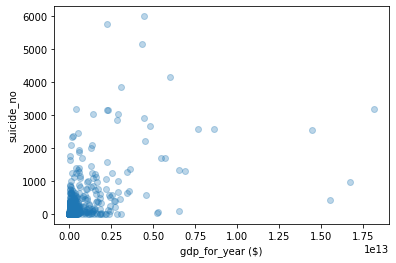

In [22]:
plt.scatter(data.iloc[random_subset][' gdp_for_year ($) '], data.iloc[random_subset]['suicides_no'], alpha = .3)
plt.xlabel('gdp_for_year ($)')
plt.ylabel('suicide_no')
pass

Количество суициов относительно ВВП на душу населения

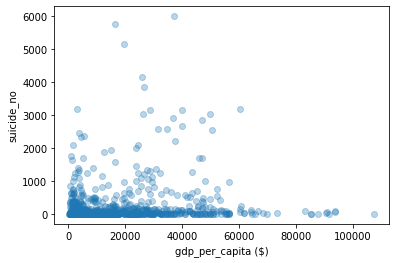

In [23]:
plt.scatter(data.iloc[random_subset]['gdp_per_capita ($)'], data.iloc[random_subset]['suicides_no'], alpha = .3)
plt.xlabel('gdp_per_capita ($)')
plt.ylabel('suicide_no')
pass

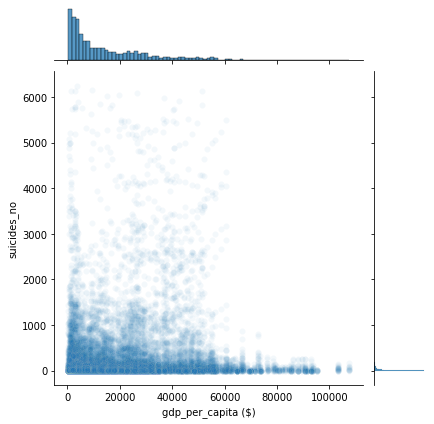

In [24]:
sns.jointplot(x='gdp_per_capita ($)', y='suicides_no', alpha=.05, data=data)
pass

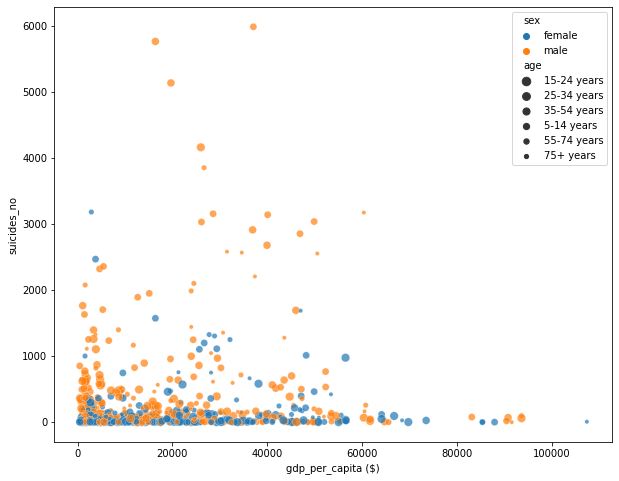

In [25]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides_no', size='age', hue='sex', data=data.iloc[random_subset], alpha=0.7)
pass

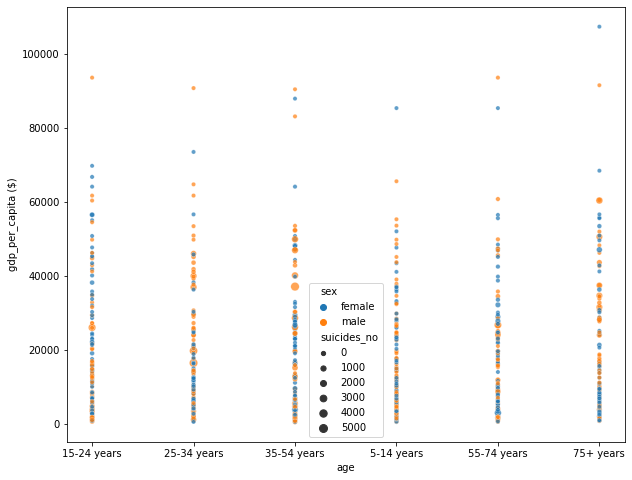

In [26]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='age', y='gdp_per_capita ($)', size='suicides_no', hue='sex', data=data.iloc[random_subset], alpha=0.7)
pass

Построим все возможные диаграммы рассеивания для каждой пары переменных

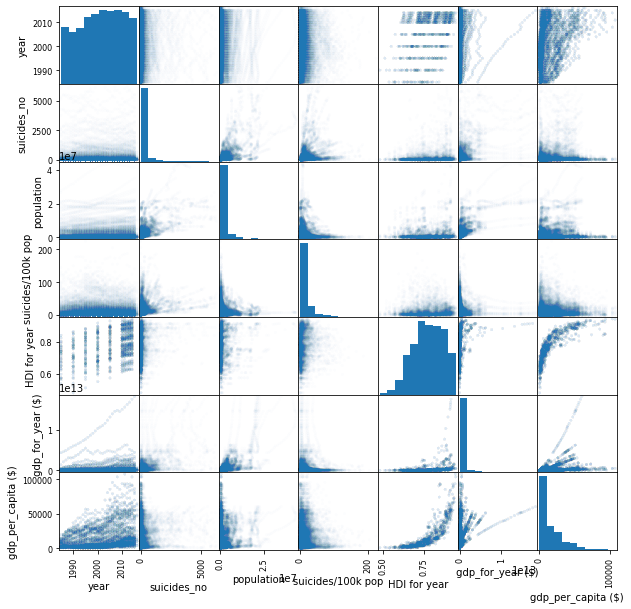

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Ящик с усами

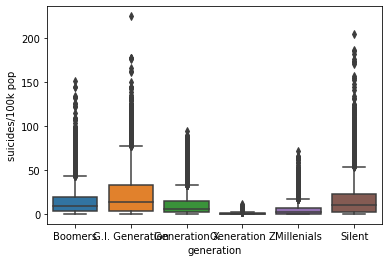

In [28]:
sns.boxplot(x="generation", y="suicides/100k pop", data=data)
pass

Скрипичные графики

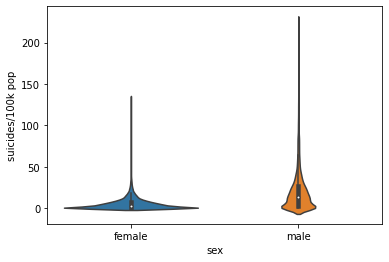

In [29]:
sns.violinplot(x="sex", y="suicides/100k pop", data=data)
pass

Корреляционная матрица

In [30]:
corr_mat = data.corr()
corr_mat

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.008238,0.007628,-0.039071,0.357847,0.092477,0.331255
suicides_no,-0.008238,1.000000,0.639551,0.290962,0.152072,0.511677,0.098229
population,0.007628,0.639551,1.000000,-0.038770,0.090366,0.690636,0.085809
suicides/100k pop,-0.039071,0.290962,-0.038770,1.000000,0.074754,0.011576,0.006041
HDI for year,0.357847,0.152072,0.090366,0.074754,1.000000,0.308405,0.795308
gdp_for_year ($),0.092477,0.511677,0.690636,0.011576,0.308405,1.000000,0.325507
gdp_per_capita ($),0.331255,0.098229,0.085809,0.006041,0.795308,0.325507,1.000000


In [31]:
corr_mat > 0.5

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,True,False,False,False,False,False,False
suicides_no,False,True,True,False,False,True,False
population,False,True,True,False,False,True,False
suicides/100k pop,False,False,False,True,False,False,False
HDI for year,False,False,False,False,True,False,True
gdp_for_year ($),False,True,True,False,False,True,False
gdp_per_capita ($),False,False,False,False,True,False,True


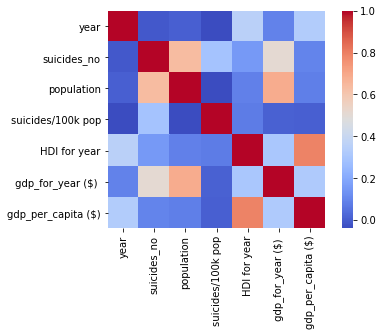

In [32]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Видна очевидная корреляция между индексом человеческого развития и подушевым ВВП. И вполне ожидаемая корреляция между количетвом населения и количеством суицидов.

Диаграмма количества самоубийств по поколениям

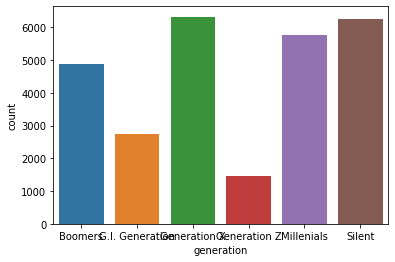

In [33]:
sns.countplot(x='generation', data=data)
pass

## **4. Заполнение пропущенных значений**

In [34]:
data.dtypes

country               category
year                     int64
sex                   category
age                   category
suicides_no              int64
population               int64
suicides/100k pop      float64
country-year          category
HDI for year           float64
 gdp_for_year ($)      float64
gdp_per_capita ($)       int64
generation            category
dtype: object

In [35]:
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19185
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [36]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [37]:
data.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [38]:
data.shape

(27416, 12)

In [39]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27416.000000,27416.000000,2.741600e+04,27416.000000,27416.000000,2.741600e+04,27416.000000
mean,2001.227896,196.169573,1.763770e+06,12.611183,0.777262,4.278492e+11,16442.348665
std,8.474799,540.752165,3.618902e+06,18.718327,0.050613,1.383653e+12,17661.509817
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,426.000000
25%,1995.000000,3.000000,9.803450e+04,0.900000,0.778000,9.024567e+09,3492.000000
50%,2002.000000,25.000000,4.314125e+05,5.910000,0.778000,4.755467e+10,9356.000000
75%,2008.000000,130.000000,1.472438e+06,16.330000,0.778000,2.581543e+11,24654.000000
max,2016.000000,6250.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,107430.000000


In [40]:
data.describe(include=['category'])

,country,sex,age,country-year,generation
count,27416,27416,27416,27416,27416
unique,101,2,6,2299,6
top,Mauritius,female,75+ years,Uzbekistan2014,Generation X
freq,382,13778,4598,12,6321


**Векторизация**

In [42]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['country', 'sex', 'age', 'country-year', 'generation']
numerical_columns= ['year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']


In [43]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= ['sex']
nonbinary_columns= ['country', 'age', 'country-year', 'generation']


Бинарный признак `sex` заменим на числовой

In [44]:
data['sex'] = pd.factorize(data['sex'])[0]

Применим метод бинаризации (one-hot encoding)

In [45]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['country_Albania', 'country_Antigua and Barbuda', 'country_Argentina',
       'country_Armenia', 'country_Aruba', 'country_Australia',
       'country_Austria', 'country_Azerbaijan', 'country_Bahamas',
       'country_Bahrain',
       ...
       'country-year_Uzbekistan2011', 'country-year_Uzbekistan2012',
       'country-year_Uzbekistan2013', 'country-year_Uzbekistan2014',
       'generation_Boomers', 'generation_G.I. Generation',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent'],
      dtype='object', length=2434)


**Нормализация**

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

Не будем нормализовать целевой признак `suicides_no`

In [46]:
numerical_columns_exept_suicides_no=['year', 'population', 'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']

In [47]:
data_numerical_exept_suicides_no = data[numerical_columns_exept_suicides_no]
data_numerical_exept_suicides_no.describe()

,year,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27416.000000,2.741600e+04,27416.000000,27416.000000,2.741600e+04,27416.000000
mean,2001.227896,1.763770e+06,12.611183,0.777262,4.278492e+11,16442.348665
std,8.474799,3.618902e+06,18.718327,0.050613,1.383653e+12,17661.509817
min,1985.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,426.000000
25%,1995.000000,9.803450e+04,0.900000,0.778000,9.024567e+09,3492.000000
50%,2002.000000,4.314125e+05,5.910000,0.778000,4.755467e+10,9356.000000
75%,2008.000000,1.472438e+06,16.330000,0.778000,2.581543e+11,24654.000000
max,2016.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,107430.000000


In [48]:
data_numerical_exept_suicides_no = (data_numerical_exept_suicides_no - data_numerical_exept_suicides_no.mean(axis = 0))/data_numerical_exept_suicides_no.std(axis = 0)

In [49]:
data_numerical_exept_suicides_no.describe()

,year,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04
mean,1.771546e-15,7.014848e-16,-2.764964e-15,3.119815e-12,3.536386e-16,3.187720e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.914841e+00,-4.873004e-01,-6.737345e-01,-5.813930e+00,-3.091833e-01,-9.068505e-01
25%,-7.348724e-01,-4.602876e-01,-6.256533e-01,1.457754e-02,-3.026949e-01,-7.332526e-01
50%,9.110586e-02,-3.681663e-01,-3.580012e-01,1.457754e-02,-2.748482e-01,-4.012312e-01
75%,7.990873e-01,-8.050287e-02,1.986725e-01,1.457754e-02,-1.226427e-01,4.649462e-01
max,1.743062e+00,1.161718e+01,1.134497e+01,3.294348e+00,1.278707e+01,5.151748e+00


**Соединяем всё в одну таблицу**

In [50]:
data = pd.concat((data['suicides_no'], data_numerical_exept_suicides_no, data_categorical), axis = 1)
print(data.shape)

(27416, 2441)


In [51]:
data.describe()

,suicides_no,year,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominica,country_Ecuador,country_El Salvador,country_Estonia,country_Fiji,country_Finland,...,country-year_Uruguay2003,country-year_Uruguay2004,country-year_Uruguay2005,country-year_Uruguay2006,country-year_Uruguay2007,country-year_Uruguay2008,country-year_Uruguay2009,country-year_Uruguay2010,country-year_Uruguay2012,country-year_Uruguay2013,country-year_Uruguay2014,country-year_Uruguay2015,country-year_Uzbekistan1990,country-year_Uzbekistan1991,country-year_Uzbekistan1992,country-year_Uzbekistan1993,country-year_Uzbekistan1994,country-year_Uzbekistan1995,country-year_Uzbekistan1996,country-year_Uzbekistan1997,country-year_Uzbekistan1998,country-year_Uzbekistan1999,country-year_Uzbekistan2000,country-year_Uzbekistan2001,country-year_Uzbekistan2002,country-year_Uzbekistan2003,country-year_Uzbekistan2004,country-year_Uzbekistan2005,country-year_Uzbekistan2009,country-year_Uzbekistan2010,country-year_Uzbekistan2011,country-year_Uzbekistan2012,country-year_Uzbekistan2013,country-year_Uzbekistan2014,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
count,27416.000000,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,2.741600e+04,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,...,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000,27416.000000
mean,196.169573,1.771546e-15,7.014848e-16,-2.764964e-15,3.119815e-12,3.536386e-16,3.187720e-16,0.009192,0.011818,0.013569,0.009556,0.006128,0.013131,0.013933,0.007003,0.010067,0.009192,0.010943,0.009192,0.013569,0.012256,0.000875,0.013569,0.013131,0.000438,0.012693,0.013569,0.013569,0.013131,0.009556,0.010505,0.006493,0.011745,0.009629,0.000438,0.013569,0.010505,0.009192,0.004815,0.012693,...,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.000438,0.177925,0.099467,0.230559,0.052816,0.210753,0.228480
std,540.752165,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.095434,0.108068,0.115694,0.097291,0.078042,0.113838,0.117217,0.083393,0.099831,0.095434,0.104034,0.095434,0.115694,0.110027,0.029575,0.115694,0.113838,0.020917,0.111949,0.115694,0.115694,0.113838,0.097291,0.101955,0.080316,0.107738,0.097658,0.020917,0.115694,0.101955,0.095434,0.069222,0.111949,...,0.020917,0.020917,0.020917,0.020917,0.020917,0.020917,0.020917,0.020917,0.020917,

**X и Y Отброр признаков**

In [52]:
X = data.drop('suicides_no', axis = 1) 
y = data['suicides_no']
feature_names = X.columns

In [53]:
type(feature_names)

pandas.core.indexes.base.Index

In [54]:
feature_names

Index(['year', 'population', 'suicides/100k pop', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'country_Albania',
       'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia',
       ...
       'country-year_Uzbekistan2011', 'country-year_Uzbekistan2012',
       'country-year_Uzbekistan2013', 'country-year_Uzbekistan2014',
       'generation_Boomers', 'generation_G.I. Generation',
       'generation_Generation X', 'generation_Generation Z',
       'generation_Millenials', 'generation_Silent'],
      dtype='object', length=2440)

In [55]:
X = X.to_numpy()

In [56]:
y = y.to_numpy()

In [57]:
print(X.shape)
print(y.shape)
N, d = X.shape

(27416, 2440)
(27416,)


In [58]:
type(X)

numpy.ndarray

In [59]:
type(y)

numpy.ndarray

**Разбиваем на обучающую и тестовую выборки**

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# тестовая выборка - 30% данных
# random_state фиксирует split

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

19191 8225
X_train:  (19191, 2440)
X_test:   (8225, 2440)
y_train:  (19191,)
y_test:   (8225,)


**kNN**

Точность выборок для 1, 10, 20, 30, 40, 50 соседей

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([1,10,20,30,40,50])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =', knn.score(X_test, y_test))
    i+=1

neighbours = 1 train accuracy = 1.0 test accuracy = 0.1657142857142857
neighbours = 10 train accuracy = 0.2759626908446668 test accuracy = 0.18407294832826748
neighbours = 20 train accuracy = 0.2343806992861237 test accuracy = 0.183951367781155
neighbours = 30 train accuracy = 0.20989005262883642 test accuracy = 0.1829787234042553
neighbours = 40 train accuracy = 0.19472669480485644 test accuracy = 0.17689969604863223
neighbours = 50 train accuracy = 0.18472200510656037 test accuracy = 0.17483282674772035


Посмотрим точность обучающей выборки для 1-9 соседей

In [62]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(9,0,-1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)

    y_train_predict = knn.predict(X_train)
    err_train = np.mean(y_train != y_train_predict)
    accuracy=1-err_train
    print('neighbours =',i, 'train error =',err_train,'train accuracy =',accuracy)

neighbours = 9 train error = 0.7180970246469699 train accuracy = 0.2819029753530301
neighbours = 8 train error = 0.710801938408629 train accuracy = 0.28919806159137096
neighbours = 7 train error = 0.7013704340576312 train accuracy = 0.2986295659423688
neighbours = 6 train error = 0.6896461883174405 train accuracy = 0.3103538116825595
neighbours = 5 train error = 0.6678651451201084 train accuracy = 0.3321348548798916
neighbours = 4 train error = 0.6393622010317336 train accuracy = 0.3606377989682664
neighbours = 3 train error = 0.5767807826585378 train accuracy = 0.4232192173414622
neighbours = 2 train error = 0.42775259236100255 train accuracy = 0.5722474076389974
neighbours = 1 train error = 0.0 train accuracy = 1.0


Точность выборок для 2-9 соседей

In [63]:
neighbors_array = np.array([2,3,4,5,6,7,8,9])
for i in range (8):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =', knn.score(X_test, y_test))
    i+=1

neighbours = 2 train accuracy = 0.5722474076389974 test accuracy = 0.19574468085106383
neighbours = 3 train accuracy = 0.4232192173414621 test accuracy = 0.19319148936170213
neighbours = 4 train accuracy = 0.36063779896826637 test accuracy = 0.19148936170212766
neighbours = 5 train accuracy = 0.33213485487989164 test accuracy = 0.19161094224924013
neighbours = 6 train accuracy = 0.31035381168255954 test accuracy = 0.1900303951367781
neighbours = 7 train accuracy = 0.29862956594236884 test accuracy = 0.18565349544072948
neighbours = 8 train accuracy = 0.28919806159137096 test accuracy = 0.18443768996960486
neighbours = 9 train accuracy = 0.28190297535303005 test accuracy = 0.1827355623100304


Самая высокая точность на обучающей выборке была достигнута с одним соседом. Максимальная точность на тестовой выборке была достигнута для двух соседей.